In [ ]:
# In Class Lab 6
# Surface Brightness Profiles


In [1]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile
from GalaxyMass import ComponentMass

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `sersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [24]:
def sersic_e(r, re, n, mtot):
    """ Function that computes the sersic profile for an Elliptical galaxy, assuming M/L - 1
    
    Inputs:
        r : float
            Radius out from the centre of the galaxy
        r_e : float
            The half-light radius
        n : int
            Sersic profile index
        mtot : float
            Total mass of the system
    
    Outputs:
        I : array of floats
            The surface brightness profile of the elliptical Lsun/kpc^2
    """
    lum = mtot ## as we assume M/L = 1
    
    Ie = lum/7.2/np.pi/re**2
    
    a = (r/re)**(1/n)
    b = -7.67*(a-1)
    I = Ie*np.exp(b)
    
    return I

# Part B

a) Create an instance of the MassProfile Class for M31. Store it as a variable `M31`. 


In [25]:
M31 = MassProfile("M31", 0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [26]:
r = np.arange(0.1, 30, 0.1)

c) Define a new array called `bulge_mass`, that uses the function `MassEnclosed` within MassProfile to compute the mass profile of the bulge.  Get rid of astropy units in `bulge_mass` by adding `.value` 


In [27]:
bulge_mass = M31.massEnclosed(3, r).value

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `bulge_I`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [28]:
bulge_I = bulge_mass/4/np.pi/r**2

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [29]:
bulge_total = ComponentMass("M31_000.txt", 3) * 1e12

In [30]:
b_half = bulge_total/2

In [34]:
index = np.where(bulge_mass > b_half)[0][0]

In [35]:
re_bulge = r[index]

# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

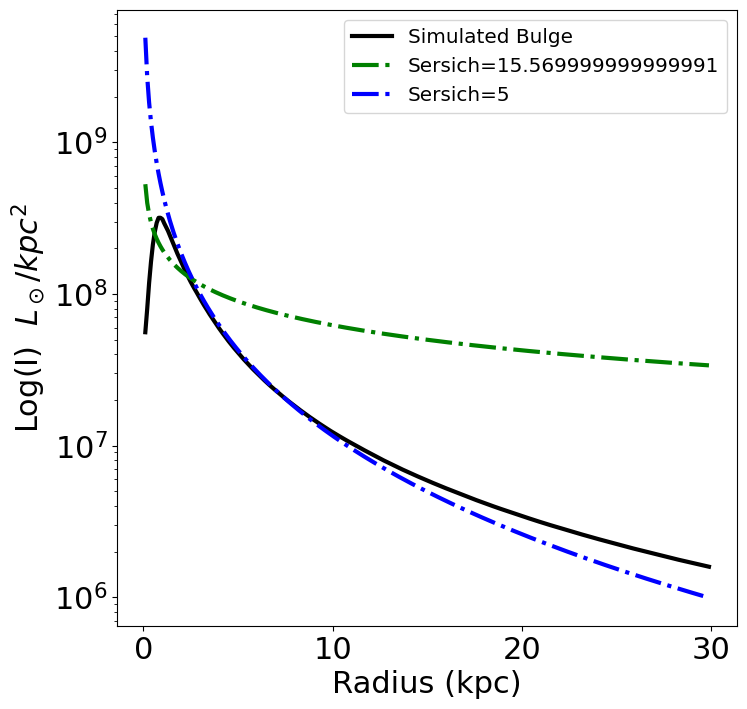

In [44]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)


# plot the bulge mass density as a proxy for surface brighntess
plt.semilogy(r, bulge_I, color="black", linewidth=3, label="Simulated Bulge")

# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 

b = 0
mi = None
a = 0
for i in np.arange(0.1, 30, 0.01):
    x = sersic_e(r, re_bulge, i, bulge_total,)
    rmse = np.linalg.norm(bulge_I - x)
    #plt.semilogy(r, x, color="red",  label=f"Sersich={i}")
    if mi == None or rmse < mi:
        mi = rmse
        a = i
        b = x
        


plt.semilogy(r, b, color="green", linewidth=3, linestyle="-.", label=f"Sersich={a}")

plt.semilogy(r, sersic_e(r, re_bulge, 5, bulge_total,), color="blue", linewidth=3, linestyle="-.", label=f"Sersich=5")

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')


plt.savefig('Lab6.png')